## Incomplete Profile Analysis for repeated measures designs

All data other than the names of variables have been redacted from this document. The graph at the end contains numbers that are not in any way linked to the data that was analysed

Analysis: Profile Analysis

Assumptions:

No Missing Data - some variables had more than 5% so both participants with missing data were removed   
Outliers - Univariate - winzorised some variables    
Outliers - Multivariate - None detected via Mahalanobis distance  
Normality - Univariate - Shapiro Wilk test returned 4 non-nomrally distributed variables  
Normality - Multivariate - Test showed there was multivariate non-normality 
Homogeneity of Variance -  
Lineairty -  
Multicollinearity/Singularity -  
Parallelism 
Flatness - 

In [16]:
#Import packages
import os
import pandas as pd
import numpy
import seaborn as sns
from scipy.stats.mstats import winsorize
import numpy as np
from scipy.stats import chi2
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kstest
from scipy.stats import pearsonr
from pingouin import multivariate_normality

/Users/jackcrosby/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [1]:
# Set dir
os.getcwd()
os.chdir('/Users/'['REDACTED']'/Desktop/['REDACTED'])
os.getcwd()

In [2]:
# Import Dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1 = pd.read_excel('[REDACTED].xlsx')
display(df1)

TIME POINT 1:
Baseline ORS average
Baseline ROc Inflexible average
Baseline ROc Reorganisation average
Baseline GAD7 average
Baseline PHQ9 average

Time point 2:
POST ORS
POST ROc Inflexible
POST ROc Reorganisation
POST GAD7
POST PHQ9

Time point 3: 1 week follow up
FU1 ORS
FU1 ROc Inflexible
FU1 ROc Reorganisation
FU1 GAD7
FU1 PHQ9

Time point 4: 4 week follow up
FU4 ORS
FU4 ROc Inflexible
FU4 ROc Reorganisation
FU4 GAD7
FU4 PHQ9

In [3]:
df2 = df1[['BASELINE_ORS_Average',
'BASELINE_ROC_Inflexible_ Average',
'BASELINE_ROC_Reorganisation_ Average',
'BASELINE_GAD7_ Average',
'BASELINE_PHQ9_ Average',
'POST_ORS_Total',
'POST_ROC_Inflexible',
'POST_ROC_Reorganisation',
'POST_GAD7_TOTAL',
'POST_PHQ9_TOTAL',
'FU1_ORS_Total',
'FU1_ROC_Inflexible',
'FU1_ROC_Reorganisation',
'FU1_GAD7_TOTAL',
'FU1_PHQ9_TOTAL',
'FU4_ORS_Total',
'FU4_ROC_Inflexible',
'FU4_ROC_Reorganisation',
'FU4_GAD7_TOTAL',
'FU4_PHQ9_TOTAL',
'SessionsAttended']]
display(df2)

In [4]:
np.mean(df2)

In [5]:
np.std(df2)

MISSING DATA ANALYSIS

In [6]:
# percentage missing values in the dataframe
df2.isnull().sum()/len(df2)

FU1 has 5% missing data, FU4 has 10.5% so multiple imputation is only really possible for FU1. However, when you do this by rows both participants with missing data have 45.4% and 22.7% missing data meaning multiple impuation can not be used. Thus the only other option is to exclude them from the Analysis... Sorry!

In [7]:
df3 = df2.drop([13, 18])
display(df3)

UNIVARIATE OUTLIER ANALYSIS

In [4]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.boxplot(data = df3[['BASELINE_ORS_Average', 'BASELINE_ROC_Inflexible_ Average', 'BASELINE_ROC_Reorganisation_ Average', 'BASELINE_GAD7_ Average', 'BASELINE_PHQ9_ Average']])

In [3]:
sns.boxplot(data = df3[['POST_ORS_Total', 'POST_ROC_Inflexible', 'POST_ROC_Reorganisation', 'POST_GAD7_TOTAL', 'POST_PHQ9_TOTAL']])

In [2]:
sns.boxplot(data = df3[['FU1_ORS_Total', 'FU1_ROC_Inflexible', 'FU1_ROC_Reorganisation', 'FU1_GAD7_TOTAL', 'FU1_PHQ9_TOTAL']])

In [1]:
sns.boxplot(data = df3[['FU4_ORS_Total', 'FU4_ROC_Inflexible', 'FU4_ROC_Reorganisation', 'FU4_GAD7_TOTAL', 'FU4_PHQ9_TOTAL', 'SessionsAttended']])

Variables that contain outliers:
BASELINE_ROC_Inflexible_ Average
POST_ROC_Inflexible
POST_GAD7_TOTAL
POST_PHQ9_TOTAL

OUTLIER SOLUTION: WINZORISING

In [8]:
df4 = df3
display(df4)

In [9]:
print(type(df4))

In [10]:
df4[['BASELINE_ROC_Inflexible_ Average', 'POST_ROC_Inflexible', 'POST_GAD7_TOTAL', 'POST_PHQ9_TOTAL', 'FU1_PHQ9_TOTAL']] = df3[['BASELINE_ROC_Inflexible_ Average', 'POST_ROC_Inflexible', 'POST_GAD7_TOTAL', 'POST_PHQ9_TOTAL', 'FU1_PHQ9_TOTAL']].clip(lower=df3.quantile(0.10), upper=df3.quantile(0.90), axis=1)
df4.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

In [11]:
display(df4)

In [44]:
sns.boxplot(data = df4[['BASELINE_ORS_Average', 'BASELINE_ROC_Inflexible_ Average', 'BASELINE_ROC_Reorganisation_ Average', 'BASELINE_GAD7_ Average', 'BASELINE_PHQ9_ Average']])

In [43]:
sns.boxplot(data = df4[['POST_ORS_Total', 'POST_ROC_Inflexible', 'POST_ROC_Reorganisation', 'POST_GAD7_TOTAL', 'POST_PHQ9_TOTAL']])

In [42]:
sns.boxplot(data = df4[['FU1_ORS_Total', 'FU1_ROC_Inflexible', 'FU1_ROC_Reorganisation', 'FU1_GAD7_TOTAL', 'FU1_PHQ9_TOTAL']])

In [41]:
sns.boxplot(data = df3[['FU4_ORS_Total', 'FU4_ROC_Inflexible', 'FU4_ROC_Reorganisation', 'FU4_GAD7_TOTAL', 'FU4_PHQ9_TOTAL', 'SessionsAttended']])

So there are now no univariate outliers within the dataset

MULTIVARIATE OUTLIER ANALYSIS

In [12]:
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(df4)
    if not cov:
        cov = np.cov(df4.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#create new column in dataframe that contains Mahalanobis distance for each row
df4['mahalanobis'] = mahalanobis(x=df4, data=df4)
display(df4)

In [13]:
df4['mahal_p'] = 1 - chi2.cdf(df4['mahalanobis'], 20)
#display first five rows of dataframe
display(df4)

Mahalanobis p values are all above p<.001 threshold. No multivariate outliers exist within the dataset. 

No Multivariate Outliers p<.001

NORMALITY
Fairly easy way to do this, shapiro wilk test then back it up with histograms and QQ plots

Variable list:
BASELINE_ORS_Average                    
BASELINE_ROC_Inflexible_Average        
BASELINE_ROC_Reorganisation_Average    
BASELINE_GAD7_Average                  
BASELINE_PHQ9_Average                  
POST_ORS_Total                          
POST_ROC_Inflexible                     
POST_ROC_Reorganisation                 
POST_GAD7_TOTAL                         
POST_PHQ9_TOTAL                         
FU1_ORS_Total                           
FU1_ROC_Inflexible                      
FU1_ROC_Reorganisation                  
FU1_GAD7_TOTAL                          
FU1_PHQ9_TOTAL                          
FU4_ORS_Total                           
FU4_ROC_Inflexible                      
FU4_ROC_Reorganisation                  
FU4_GAD7_TOTAL                          
FU4_PHQ9_TOTAL                          
SessionsAttended                        

In [40]:
plt.hist(df4[['BASELINE_ORS_Average']])
shapiro(df4[['BASELINE_ORS_Average']])

In [39]:
plt.hist(df4[['BASELINE_ROC_Inflexible_ Average']])
shapiro(df4[['BASELINE_ROC_Inflexible_ Average']])

In [38]:
plt.hist(df4[['BASELINE_ROC_Reorganisation_ Average']])
shapiro(df4[['BASELINE_ROC_Reorganisation_ Average']])

In [37]:
plt.hist(df4[['BASELINE_GAD7_ Average']])
shapiro(df4[['BASELINE_GAD7_ Average']])

In [36]:
plt.hist(df4[['POST_ORS_Total']])
shapiro(df4[['POST_ORS_Total']])    

In [35]:
plt.hist(df4[['POST_ROC_Inflexible']])
shapiro(df4[['POST_ROC_Inflexible']])

In [34]:
plt.hist(df4[['POST_ROC_Reorganisation']])
shapiro(df4[['POST_ROC_Reorganisation']])

In [33]:
plt.hist(df4[['POST_GAD7_TOTAL']])
shapiro(df4[['POST_GAD7_TOTAL']])

In [32]:
plt.hist(df5[['POST_PHQ9_TOTAL']])
shapiro(df5[['POST_PHQ9_TOTAL']])

In [31]:
plt.hist(df4[['FU1_ORS_Total']])
shapiro(df4[['FU1_ORS_Total']])

In [30]:
plt.hist(df4[['FU1_ROC_Inflexible']])
shapiro(df4[['FU1_ROC_Inflexible']])

In [29]:
plt.hist(df4[['FU1_ROC_Reorganisation']])
shapiro(df4[['FU1_ROC_Reorganisation']])

In [27]:
plt.hist(df4[['FU1_GAD7_TOTAL']])
shapiro(df4[['FU1_GAD7_TOTAL']])

In [26]:
plt.hist(df4[['FU1_PHQ9_TOTAL']])
shapiro(df4[['FU1_PHQ9_TOTAL']])

In [25]:
plt.hist(df4[['FU4_ORS_Total']])
shapiro(df4[['FU4_ORS_Total']])

In [24]:
plt.hist(df4[['FU4_ROC_Inflexible']])
shapiro(df4[['FU4_ROC_Inflexible']])

In [23]:
plt.hist(df4[['FU4_ROC_Reorganisation']])
shapiro(df4[['FU4_ROC_Reorganisation']])

In [22]:
plt.hist(df4[['FU4_GAD7_TOTAL']])
shapiro(df4[['FU4_GAD7_TOTAL']])

In [21]:
plt.hist(df4[['FU4_PHQ9_TOTAL']])
shapiro(df4[['FU4_PHQ9_TOTAL']])

In [20]:
plt.hist(df4[['SessionsAttended']])
shapiro(df4[['SessionsAttended']])

Variables not normally distirbuted:

BASELINE_ROC_Inflexible_ Average

POST_ROC_Inflexible

POST_GAD7_TOTAL

FU1_PHQ9_TOTAL

SessionsAttended



Non-Normally Distributed Variables

BASELINE_ROC_Inflexible_Average
POST_ROC_Inflexible
SessionsAttended

Transforming variables may be useful, but the interpretation becomes very difficult. So we'll opt in for non-parametric statistics.

Friedman test would probably be the best way forward. - no covariate though.
We'll use a repeated measures MANOVA - I can't find a way to do a multivariate friedman... Unless you did a multivariate friedman but with a more strict p value (p<.01) rather than p<.05...

IV = Time Point (4 levels; baseline, post, follow up 1, follow up 2 - this took 2 hours of solid thinking...

DVs = 

ORS                          
ROC_Inflexible                     
ROC_Reorganisation                 
GAD7                         
PHQ9        

Multivariate Normality

In [169]:
multivariate_normality(df4, alpha=.05)

HZResults(hz=68, pval=0.0, normal=False)

In [14]:
np.mean(df4)

<Figure size 432x288 with 0 Axes>

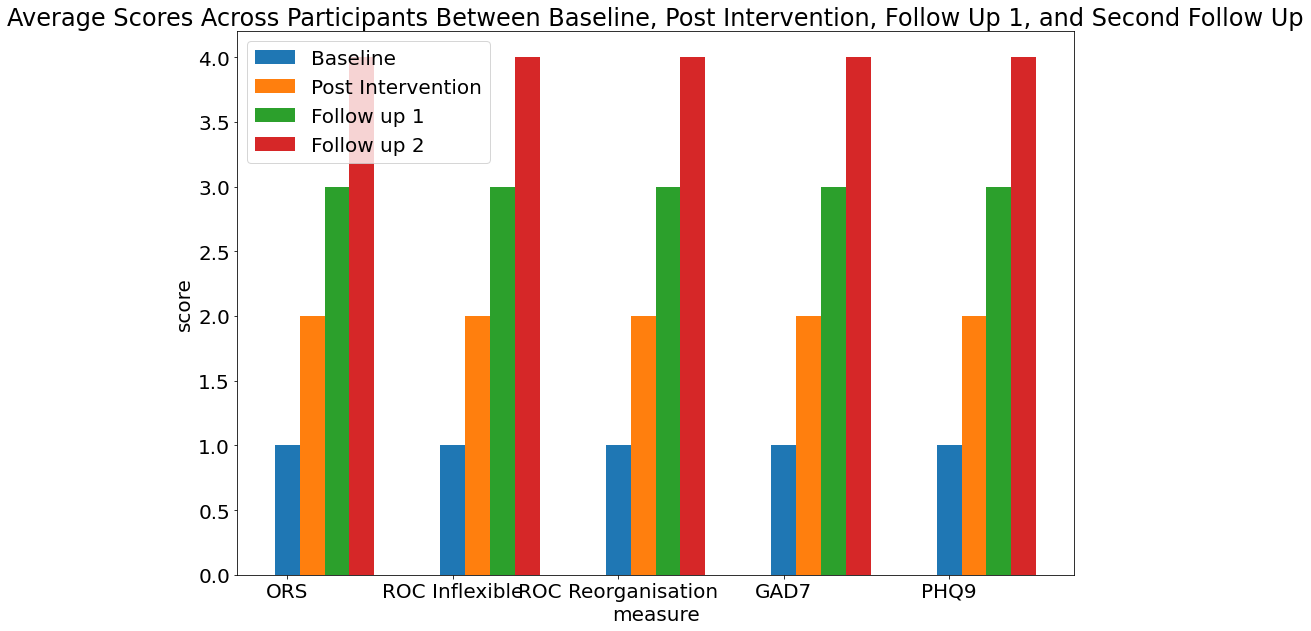

In [19]:
# Here's a bar chart to depict the differences between the different measures across the 4 time points

plt.savefig('figure.jpg')  
plt.rc('font', size=20)

#Means were redacted from this graph with random numbers to show how this then 
tp1 = [1, 1, 1, 1, 1]
tp2 = [2, 2, 2, 2, 2]
tp3 = [3, 3, 3, 3, 3]
tp4 = [4, 4, 4, 4, 4]

x = ['ORS', 'ROC Inflexible', 'ROC Reorganisation', 'GAD7', 'PHQ9']
lgnd = ['Baseline', 'Post Intervention', 'Follow up 1', 'Follow up 2']
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

width =0.15
plt.bar(x, tp1, width=width)
plt.bar(np.arange(len(tp2)) + width, tp2, width=width)
plt.bar(np.arange(len(tp3)) + width *2, tp3, width=width)
plt.bar(np.arange(len(tp4)) + width *3, tp4, width=width)
plt.legend(lgnd,loc=2)
plt.title('Average Scores Across Participants Between Baseline, Post Intervention, Follow Up 1, and Second Follow Up')
plt.xlabel('measure')
plt.ylabel('score')
plt.show() 
